# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Regression Dataset # 5

# Importing Libraraies

In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)


## Getting Dataeset

In [8]:
df=pd.read_csv('gt_2015.csv')
print(df.shape)
df.head()

(7384, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95,1020.10,84.98,2.53,20.12,1048.70,544.92,116.27,10.80,7.45,113.25
1,1.22,1020.10,87.52,2.39,18.58,1045.50,548.50,109.18,10.35,6.47,112.02
2,0.95,1022.20,78.33,2.78,22.26,1068.80,549.95,125.88,11.26,3.63,88.15
3,1.01,1021.70,76.94,2.82,23.36,1075.20,549.63,132.21,11.70,3.20,87.08
4,1.29,1021.60,76.73,2.84,23.48,1076.20,549.68,133.58,11.74,2.38,82.52


In [9]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
7379,3.63,1028.50,93.20,3.17,19.09,1037.00,541.59,109.08,10.41,10.99,89.17
7380,4.17,1028.60,94.04,3.19,19.02,1037.60,542.28,108.79,10.34,11.14,88.85
7381,5.48,1028.50,95.22,3.31,18.86,1038.00,543.48,107.81,10.46,11.41,96.15
7382,5.88,1028.70,94.20,3.98,23.56,1076.90,550.11,131.41,11.77,3.31,64.74
7383,6.04,1028.80,94.55,3.88,22.52,1067.90,548.23,125.41,11.46,11.98,109.24


In [10]:
df_c=df.copy()

### Data set details

### Dataset title:
### Gas Turbine CO and NOx Emission Data Set Data Set

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant as the dataset ([Web Link]) used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. See the attribute information and relevant paper for details. Kindly follow the protocol mentioned in the paper (using the first three years' data for training/ cross-validation and the last two for testing) for reproducibility and comparability of works. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set


#### Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [12]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00,7384.00
mean,17.23,1014.51,68.65,3.60,26.13,1078.97,546.64,133.99,12.10,3.13,59.89
std,8.10,6.90,13.54,0.61,4.47,19.76,5.49,16.18,1.14,2.23,11.13
min,-6.23,989.40,24.09,2.37,17.70,1016.00,516.04,100.02,9.87,0.21,25.91
25%,11.07,1009.68,59.45,3.12,23.15,1070.50,544.75,126.25,11.47,1.81,52.40
50%,17.46,1014.00,70.95,3.54,25.33,1080.30,549.72,131.60,11.93,2.53,56.84
75%,23.68,1018.30,79.65,4.19,30.02,1099.90,550.03,147.16,13.15,3.70,65.09
max,37.10,1036.60,96.67,5.24,40.72,1100.40,550.59,179.50,15.16,41.10,119.68


[None, None, None, None, None, None, None, None, None, None, None, None]

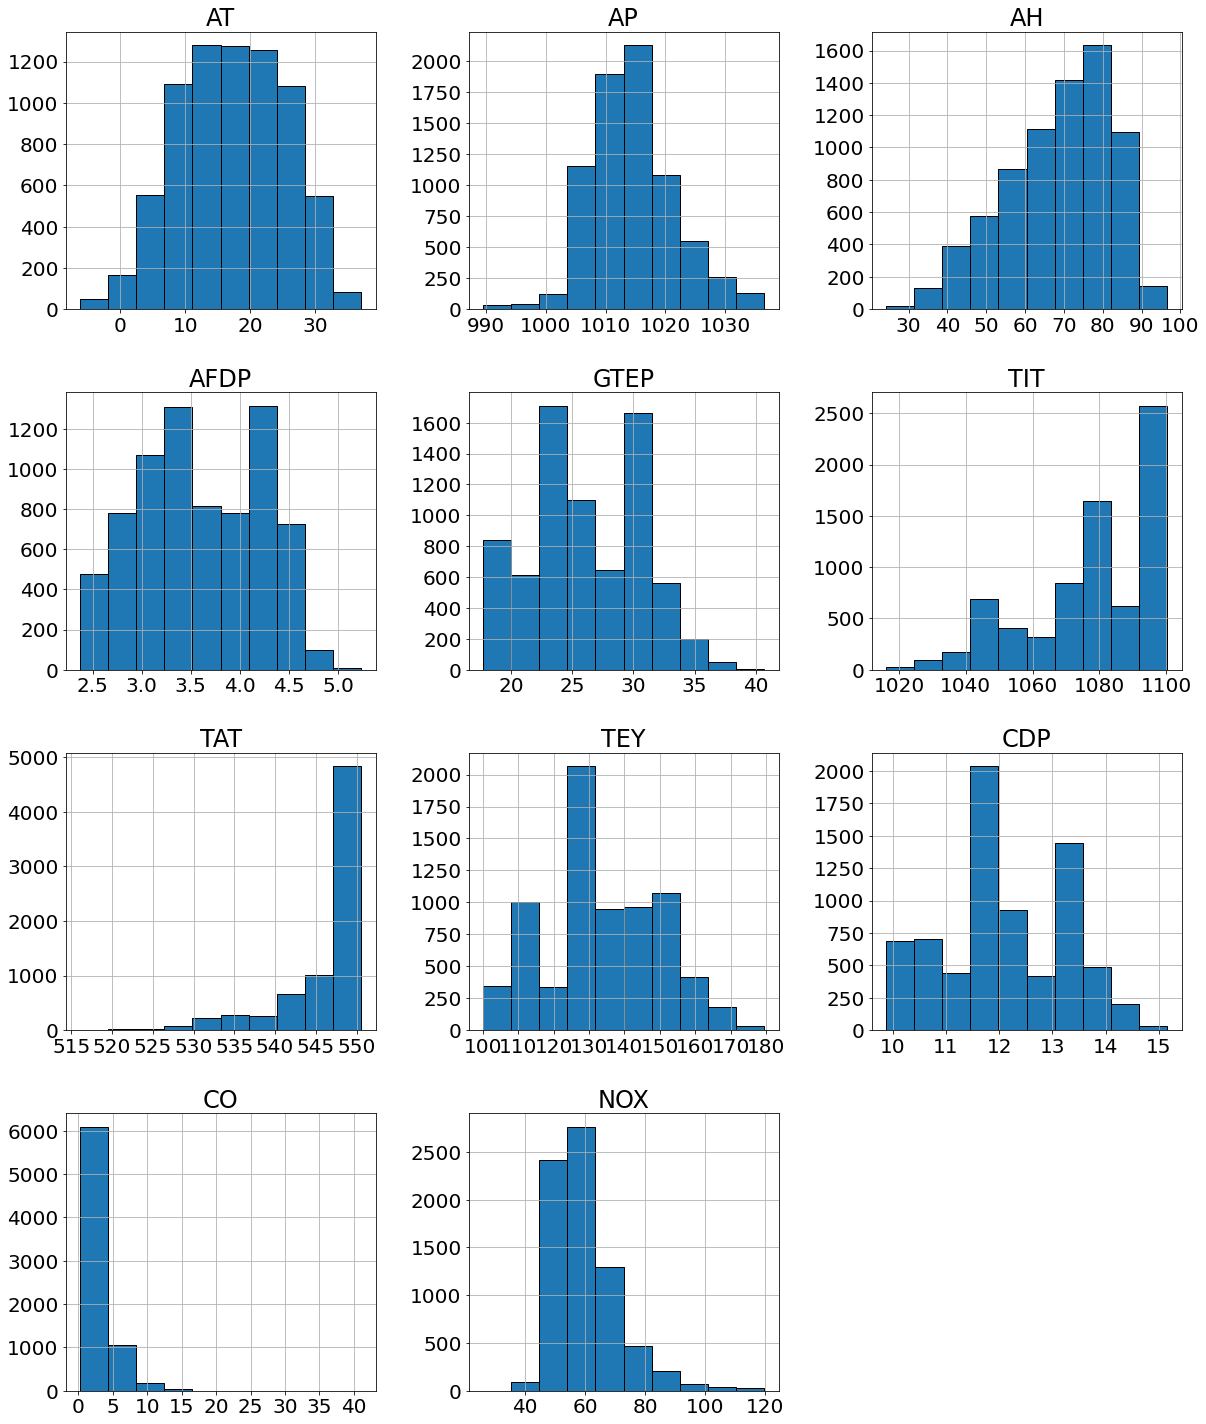

In [13]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [14]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Dropping the NaN values

In [15]:
print(df.shape)
df=df.dropna()
df.shape

(7384, 11)


(7384, 11)

### Applying Standard Scalar

In [16]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [17]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.00,-0.49,-0.47,0.47,0.19,0.33,0.21,0.11,0.20,-0.39,-0.59
AP,-0.49,1.00,0.08,-0.09,-0.04,-0.08,-0.29,0.05,0.03,0.20,0.21
AH,-0.47,0.08,1.00,-0.25,-0.30,-0.26,0.03,-0.18,-0.22,0.16,0.07
AFDP,0.47,-0.09,-0.25,1.00,0.84,0.92,-0.52,0.88,0.92,-0.64,-0.58
GTEP,0.19,-0.04,-0.30,0.84,1.00,0.89,-0.62,0.93,0.94,-0.56,-0.37
TIT,0.33,-0.08,-0.26,0.92,0.89,1.00,-0.40,0.95,0.95,-0.74,-0.52
TAT,0.21,-0.29,0.03,-0.52,-0.62,-0.40,1.00,-0.63,-0.66,0.03,0.05
TEY,0.11,0.05,-0.18,0.88,0.93,0.95,-0.63,1.00,0.99,-0.62,-0.40
CDP,0.20,0.03,-0.22,0.92,0.94,0.95,-0.66,0.99,1.00,-0.61,-0.44
CO,-0.39,0.20,0.16,-0.64,-0.56,-0.74,0.03,-0.62,-0.61,1.00,0.68


## Correlation

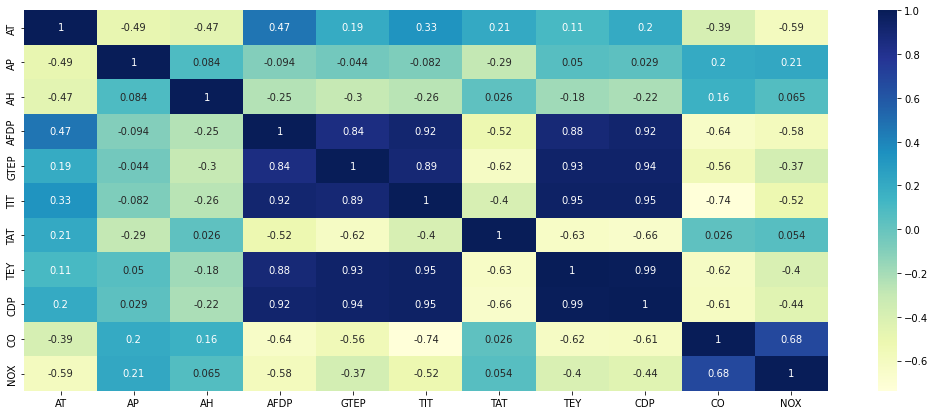

In [18]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [19]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

### for df_scaled

In [20]:
dfs = pd.DataFrame()


X=df_scaled.drop(columns=['NOX'])
y=df_scaled['NOX']

trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_scaled.corr()


cor_target = abs(cor['NOX'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)
# cor_target

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
AT,0.43,0.51,0.32,0.39,0.59,2.25
CO,0.41,0.10,0.28,0.37,0.68,1.85
AFDP,0.41,0.29,0.16,0.11,0.58,1.56
TIT,0.36,0.05,0.08,0.05,0.52,1.06
CDP,0.34,0.00,0.04,0.01,0.44,0.84
TEY,0.30,0.00,0.03,0.00,0.40,0.73
GTEP,0.29,0.02,0.02,0.02,0.37,0.71
AP,0.17,0.00,0.00,0.01,0.21,0.39
TAT,0.18,0.02,0.05,0.02,0.05,0.32
AH,0.04,0.01,0.01,0.02,0.07,0.14


#### for df

In [21]:
dfs = pd.DataFrame()

X=df.drop(columns=['NOX'])
y=df['NOX']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df.corr()


cor_target = abs(cor['NOX'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
AT,0.43,0.51,0.38,0.39,0.59,2.30
CO,0.41,0.10,0.23,0.37,0.68,1.79
AFDP,0.41,0.29,0.17,0.11,0.58,1.58
TIT,0.36,0.05,0.08,0.05,0.52,1.06
CDP,0.34,0.00,0.04,0.01,0.44,0.83
TEY,0.30,0.00,0.02,0.00,0.40,0.72
GTEP,0.29,0.02,0.02,0.02,0.37,0.71
AP,0.17,0.00,0.00,0.01,0.21,0.39
TAT,0.18,0.02,0.05,0.02,0.05,0.32
AH,0.04,0.01,0.01,0.02,0.07,0.14


In [22]:
dfs.shape

(10, 6)

In [23]:
dfs_s=dfs[dfs['sum']>1.00]
dfs_s.shape

(4, 6)

In [24]:
dfs_s

,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
AT,0.43,0.51,0.38,0.39,0.59,2.30
AFDP,0.41,0.29,0.17,0.11,0.58,1.58
TIT,0.36,0.05,0.08,0.05,0.52,1.06
CO,0.41,0.10,0.23,0.37,0.68,1.79


In [25]:
dfs_s.index

Index(['AT', 'AFDP', 'TIT', 'CO'], dtype='object')

### chosing the best top 4 features

In [26]:

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

In [27]:
df_t.head()

,AT,AFDP,TIT,CO
0,1.95,2.53,1048.70,7.45
1,1.22,2.39,1045.50,6.47
2,0.95,2.78,1068.80,3.63
3,1.01,2.82,1075.20,3.20
4,1.29,2.84,1076.20,2.38


## Making X,y

## Making train and test split and reducing dataste size

In [29]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

#### for df

In [30]:

X=df_t
y=df['NOX']

# reduce X,y

reduce= int(X.shape[0] * 0.15)

X,y = X[:reduce], y[:reduce]


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


In [31]:
X.shape

(1107, 4)

In [32]:
y_train.shape

(774,)

In [33]:
X_train.shape

(774, 4)

#### for df_scaled

In [34]:
Xs=df_ts
ys=df_scaled['NOX']
# ys=df_log['SSPL']

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.15)

Xs,ys = Xs[:reduce], ys[:reduce]


offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [35]:
Xs_train.shape

(774, 4)

In [36]:
df_t.describe()

,AT,AFDP,TIT,CO
count,7384.00,7384.00,7384.00,7384.00
mean,17.23,3.60,1078.97,3.13
std,8.10,0.61,19.76,2.23
min,-6.23,2.37,1016.00,0.21
25%,11.07,3.12,1070.50,1.81
50%,17.46,3.54,1080.30,2.53
75%,23.68,4.19,1099.90,3.70
max,37.10,5.24,1100.40,41.10


In [37]:
df_ts.describe()

,AT,AFDP,TIT,CO
count,7384.00,7384.00,7384.00,7384.00
mean,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-2.90,-2.02,-3.19,-1.31
25%,-0.76,-0.79,-0.43,-0.59
50%,0.03,-0.10,0.07,-0.27
75%,0.80,0.98,1.06,0.26
max,2.46,2.69,1.08,16.99


In [38]:
X.describe()

,AT,AFDP,TIT,CO
count,1107.00,1107.00,1107.00,1107.00
mean,7.87,3.28,1075.23,3.94
std,5.20,0.58,20.09,2.13
min,-6.23,2.37,1020.20,0.22
25%,3.99,2.89,1064.45,2.86
50%,8.38,3.09,1074.50,3.48
75%,11.65,4.00,1099.90,4.29
max,21.05,4.63,1100.20,29.60


In [39]:
Xs.describe()

,AT,AFDP,TIT,CO
count,1107.00,1107.00,1107.00,1107.00
mean,-1.16,-0.52,-0.19,0.36
std,0.64,0.95,1.02,0.95
min,-2.90,-2.02,-2.97,-1.30
25%,-1.64,-1.17,-0.74,-0.12
50%,-1.09,-0.83,-0.23,0.15
75%,-0.69,0.66,1.06,0.52
max,0.47,1.69,1.07,11.84


In [40]:
X_train.shape

(774, 4)

In [41]:
X_test.shape

(333, 4)

In [42]:
X.shape

(1107, 4)

In [43]:
X_train.shape

(774, 4)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [44]:
reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


 21%|██▏       | 9/42 [00:00<00:00, 35.32it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6458592040834477, 'Adjusted R-Squared': 0.6415404138893434, 'RMSE': 5.356418520405297, 'Time taken': 0.06607365608215332}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6572130953344046, 'Adjusted R-Squared': 0.6530327672287266, 'RMSE': 5.269854622907219, 'Time taken': 0.026683568954467773}
{'Model': 'BayesianRidge', 'R-Squared': 0.632501382489354, 'Adjusted R-Squared': 0.628019692031907, 'RMSE': 5.45650274871147, 'Time taken': 0.006794929504394531}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5152901926333975, 'Adjusted R-Squared': 0.5093790974216097, 'RMSE': 6.266534385224516, 'Time taken': 0.006428956985473633}
{'Model': 'DummyRegressor', 'R-Squared': -0.4760344334290345, 'Adjusted R-Squared': -0.49403485334890074, 'RMSE': 10.935402379229492, 'Time taken': 0.006424903869628906}
{'Model': 'ElasticNet', 'R-Squared': 0.5237646895572824, 'Adjusted R-Squared': 0.5179569418689566, 'RMSE': 6.211511877265403, 'Time taken': 0.00830340385437011


 26%|██▌       | 11/42 [00:00<00:01, 28.38it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.41366418834018326, 'Adjusted R-Squared': 0.4065137516126245, 'RMSE': 6.892229553676701, 'Time taken': 0.009047269821166992}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1958.521214626065, 'Adjusted R-Squared': -1982.4178148044318, 'RMSE': 398.4386944002346, 'Time taken': 0.09272170066833496}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6897627826801721, 'Adjusted R-Squared': 0.6859794019811498, 'RMSE': 5.013412870936196, 'Time taken': 0.1024618148803711}


 38%|███▊      | 16/42 [00:00<00:01, 15.17it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6513158184983302, 'Adjusted R-Squared': 0.6470635723824562, 'RMSE': 5.314992380238766, 'Time taken': 0.25862550735473633}
{'Model': 'HuberRegressor', 'R-Squared': 0.5170104611847821, 'Adjusted R-Squared': 0.5111203448577673, 'RMSE': 6.255404319641752, 'Time taken': 0.013841867446899414}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7464939808997246, 'Adjusted R-Squared': 0.7434024440814286, 'RMSE': 4.531903578816268, 'Time taken': 0.009775400161743164}
{'Model': 'KernelRidge', 'R-Squared': -61.025651748368155, 'Adjusted R-Squared': -61.78206213554338, 'RMSE': 70.887913187766, 'Time taken': 0.07891321182250977}
{'Model': 'Lars', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 5.456976961259335, 'Time taken': 0.03548908233642578}
{'Model': 'LarsCV', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 5.456976961259335, 'Time taken': 0.02220892906188965}
{'Model': 'L


 48%|████▊     | 20/42 [00:00<00:01, 17.91it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6328906241262116, 'Adjusted R-Squared': 0.6284136805179946, 'RMSE': 5.453612315050228, 'Time taken': 0.036376237869262695}
{'Model': 'LassoLars', 'R-Squared': -0.4760344334290345, 'Adjusted R-Squared': -0.49403485334890074, 'RMSE': 10.935402379229492, 'Time taken': 0.007081270217895508}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 5.456976961259335, 'Time taken': 0.010972976684570312}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 5.456976961259335, 'Time taken': 0.0068089962005615234}
{'Model': 'LinearRegression', 'R-Squared': 0.6324375027346525, 'Adjusted R-Squared': 0.6279550332558068, 'RMSE': 5.456976961259321, 'Time taken': 0.005963325500488281}
{'Model': 'LinearSVR', 'R-Squared': 0.49567549429569924, 'Adjusted R-Squared': 0.48952519544564677, 'RMSE': 6.392070543620377, 'Time taken': 0.008679628372192383}



 62%|██████▏   | 26/42 [00:01<00:01, 15.34it/s]

{'Model': 'MLPRegressor', 'R-Squared': -2.6098818837063313, 'Adjusted R-Squared': -2.653904833507628, 'RMSE': 17.10145332621223, 'Time taken': 0.4807307720184326}
{'Model': 'NuSVR', 'R-Squared': 0.8193111635654746, 'Adjusted R-Squared': 0.8171076411699316, 'RMSE': 3.826063592418711, 'Time taken': 0.0493006706237793}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.45749644327145444, 'Adjusted R-Squared': 0.4508805462381795, 'RMSE': 6.6296075191009205, 'Time taken': 0.008574247360229492}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6324375027346505, 'Adjusted R-Squared': 0.6279550332558048, 'RMSE': 5.456976961259336, 'Time taken': 0.010658502578735352}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.18143951284092807, 'Adjusted R-Squared': 0.17145706787557358, 'RMSE': 8.143515211666806, 'Time taken': 0.008313655853271484}
{'Model': 'PoissonRegressor', 'R-Squared': 0.6475908979681928, 'Adjusted R-Squared': 0.6432932259921951, 'RMSE': 5.343306441439538, 'Time taken'


 76%|███████▌  | 32/42 [00:10<00:05,  1.94it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.8777912481805208, 'Adjusted R-Squared': -0.900691141451015, 'RMSE': 12.33417706736996, 'Time taken': 9.290109157562256}
{'Model': 'RANSACRegressor', 'R-Squared': 0.4553181937816304, 'Adjusted R-Squared': 0.4486757327301869, 'RMSE': 6.642903719930406, 'Time taken': 0.02941751480102539}



 81%|████████  | 34/42 [00:11<00:03,  2.49it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7146799902540473, 'Adjusted R-Squared': 0.7112004779400722, 'RMSE': 4.8078691399773525, 'Time taken': 0.23552870750427246}
{'Model': 'Ridge', 'R-Squared': 0.6325157437818028, 'Adjusted R-Squared': 0.6280342284620686, 'RMSE': 5.456396131715413, 'Time taken': 0.007203340530395508}
{'Model': 'RidgeCV', 'R-Squared': 0.6310199234176377, 'Adjusted R-Squared': 0.6265201663861455, 'RMSE': 5.46748980398353, 'Time taken': 0.00836324691772461}
{'Model': 'SGDRegressor', 'R-Squared': 0.6398452896075995, 'Adjusted R-Squared': 0.635453158993058, 'RMSE': 5.401707617516959, 'Time taken': 0.007523298263549805}
{'Model': 'SVR', 'R-Squared': 0.8134115844162608, 'Adjusted R-Squared': 0.8111361159335323, 'RMSE': 3.8880233273244627, 'Time taken': 0.03392839431762695}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6324375027346525, 'Adjusted R-Squared': 0.6279550332558068, 'RMSE': 5.456976961259321, 'Time taken': 0.006772279739379883}
{'Model': 'Tweedi

100%|██████████| 42/42 [00:11<00:00,  3.63it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6009263693424922, 'Adjusted R-Squared': 0.596059617749108, 'RMSE': 5.686080967134083, 'Time taken': 0.2688133716583252}
{'Model': 'LGBMRegressor', 'R-Squared': 0.6780749381929464, 'Adjusted R-Squared': 0.6741490228050555, 'RMSE': 5.106977181189767, 'Time taken': 0.07532072067260742}
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
NuSVR                                        0.82       0.82   3.83   
SVR                                          0.81       0.81   3.89   
KNeighborsRegressor                          0.74       0.75   4.53   
ExtraTreesRegressor                          0.74       0.75   4.54   
RandomForestRegressor                        0.71       0.71   4.81   
GradientBoostingRegressor                    0.69       0.69   5.01   
LGBMRegressor                                0.67       0.68   5.11   
BaggingRegressor                    

### Lazy predict for df_scaled

In [45]:

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, ys_train, ys_test)

# models_1, predictions = reg.fit(X, X, y, y)

print(models_1)




  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6296810892786128, 'Adjusted R-Squared': 0.6251650050015227, 'RMSE': 0.4920538042003063, 'Time taken': 0.08356738090515137}



  5%|▍         | 2/42 [00:00<00:02, 16.34it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6732242173598423, 'Adjusted R-Squared': 0.6692391468398404, 'RMSE': 0.4622209016309091, 'Time taken': 0.03819561004638672}
{'Model': 'BayesianRidge', 'R-Squared': 0.6325013825835943, 'Adjusted R-Squared': 0.6280196921272967, 'RMSE': 0.4901765190870089, 'Time taken': 0.007462263107299805}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.4946827476245471, 'Adjusted R-Squared': 0.4885203421077733, 'RMSE': 0.5747867016279976, 'Time taken': 0.008878946304321289}
{'Model': 'DummyRegressor', 'R-Squared': -0.4760344334290354, 'Adjusted R-Squared': -0.4940348533489016, 'RMSE': 0.9823650276763085, 'Time taken': 0.00893545150756836}
{'Model': 'ElasticNet', 'R-Squared': -0.036934688774955315, 'Adjusted R-Squared': -0.049580233760015746, 'RMSE': 0.8233800692946911, 'Time taken': 0.006658077239990234}
{'Model': 'ElasticNetCV', 'R-Squared': 0.6328940947151593, 'Adjusted R-Squared': 0.6284171934311978, 'RMSE': 0.48991454569399057, 'Time taken': 0.040934324


 21%|██▏       | 9/42 [00:00<00:01, 19.38it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7468707427537277, 'Adjusted R-Squared': 0.7437838005921877, 'RMSE': 0.40681393520167175, 'Time taken': 0.12345528602600098}



 26%|██▌       | 11/42 [00:00<00:01, 18.04it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -1959.0496378912146, 'Adjusted R-Squared': -1982.9526822557416, 'RMSE': 35.797952183732725, 'Time taken': 0.12226629257202148}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6898058460862869, 'Adjusted R-Squared': 0.6860229905507538, 'RMSE': 0.45034096380498295, 'Time taken': 0.12938213348388672}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6513629595482513, 'Adjusted R-Squared': 0.64711128832323, 'RMSE': 0.4774318762349994, 'Time taken': 0.2043156623840332}

 40%|████      | 17/42 [00:00<00:01, 14.08it/s]


{'Model': 'HuberRegressor', 'R-Squared': 0.5170116813269023, 'Adjusted R-Squared': 0.5111215798796694, 'RMSE': 0.5619439013333306, 'Time taken': 0.011262893676757812}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7464939808997246, 'Adjusted R-Squared': 0.7434024440814286, 'RMSE': 0.40711657698908454, 'Time taken': 0.007918834686279297}
{'Model': 'KernelRidge', 'R-Squared': -0.7641543898648211, 'Adjusted R-Squared': -0.7856684677900019, 'RMSE': 1.0739719621029327, 'Time taken': 0.07739830017089844}
{'Model': 'Lars', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 0.49021911930361173, 'Time taken': 0.009575366973876953}
{'Model': 'LarsCV', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 0.49021911930361173, 'Time taken': 0.05718398094177246}
{'Model': 'Lasso', 'R-Squared': -0.4760344334290354, 'Adjusted R-Squared': -0.4940348533489016, 'RMSE': 0.9823650276763085, 'Time taken': 0.010232210159301758}



 48%|████▊     | 20/42 [00:01<00:01, 16.22it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6328906241262113, 'Adjusted R-Squared': 0.6284136805179944, 'RMSE': 0.4899168614943695, 'Time taken': 0.04909968376159668}
{'Model': 'LassoLars', 'R-Squared': -0.4760344334290354, 'Adjusted R-Squared': -0.4940348533489016, 'RMSE': 0.9823650276763085, 'Time taken': 0.012000322341918945}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 0.49021911930361173, 'Time taken': 0.017068862915039062}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6324375027346507, 'Adjusted R-Squared': 0.627955033255805, 'RMSE': 0.49021911930361173, 'Time taken': 0.008595943450927734}
{'Model': 'LinearRegression', 'R-Squared': 0.6324375027346522, 'Adjusted R-Squared': 0.6279550332558064, 'RMSE': 0.4902191193036108, 'Time taken': 0.010690450668334961}
{'Model': 'LinearSVR', 'R-Squared': 0.4793046126533441, 'Adjusted R-Squared': 0.4729546689052142, 'RMSE': 0.5834672899463966, 'Time taken': 0.014450550079345703}



 62%|██████▏   | 26/42 [00:01<00:01, 13.33it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.8021676084440049, 'Adjusted R-Squared': 0.7997550183030782, 'RMSE': 0.359644438830167, 'Time taken': 0.5731241703033447}
{'Model': 'NuSVR', 'R-Squared': 0.7806902706105208, 'Adjusted R-Squared': 0.7780157617155271, 'RMSE': 0.3786636337284821, 'Time taken': 0.06121039390563965}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.45749644327145444, 'Adjusted R-Squared': 0.4508805462381795, 'RMSE': 0.5955605791291898, 'Time taken': 0.00980067253112793}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6324375027346505, 'Adjusted R-Squared': 0.6279550332558048, 'RMSE': 0.49021911930361195, 'Time taken': 0.012315511703491211}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5276926143153757, 'Adjusted R-Squared': -0.546323012050929, 'RMSE': 0.9994075780035453, 'Time taken': 0.008383750915527344}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution



 76%|███████▌  | 32/42 [00:09<00:04,  2.20it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.8784711227298434, 'Adjusted R-Squared': -0.901379307153378, 'RMSE': 1.108222364552363, 'Time taken': 7.954060792922974}
{'Model': 'RANSACRegressor', 'R-Squared': 0.45531819378162997, 'Adjusted R-Squared': 0.44867573273018646, 'RMSE': 0.5967550228490349, 'Time taken': 0.04771590232849121}



 81%|████████  | 34/42 [00:09<00:02,  2.78it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7137107900285196, 'Adjusted R-Squared': 0.7102194581995991, 'RMSE': 0.43264046698025743, 'Time taken': 0.21823835372924805}
{'Model': 'Ridge', 'R-Squared': 0.6325157437818022, 'Adjusted R-Squared': 0.6280342284620681, 'RMSE': 0.4901669413762527, 'Time taken': 0.006487607955932617}
{'Model': 'RidgeCV', 'R-Squared': 0.6310199234177064, 'Adjusted R-Squared': 0.626520166386215, 'RMSE': 0.49116352433554966, 'Time taken': 0.006227970123291016}
{'Model': 'SGDRegressor', 'R-Squared': 0.6340826762108918, 'Adjusted R-Squared': 0.6296202698232197, 'RMSE': 0.4891208027281998, 'Time taken': 0.006539344787597656}
{'Model': 'SVR', 'R-Squared': 0.7784524563950146, 'Adjusted R-Squared': 0.7757506570827587, 'RMSE': 0.38059065306680573, 'Time taken': 0.027120351791381836}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6324375027346522, 'Adjusted R-Squared': 0.6279550332558064, 'RMSE': 0.4902191193036108, 'Time taken': 0.007349491119384766}
{'Model

100%|██████████| 42/42 [00:10<00:00,  4.04it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.603892742017088, 'Adjusted R-Squared': 0.5990621657002232, 'RMSE': 0.5088983569946315, 'Time taken': 0.26911330223083496}
{'Model': 'LGBMRegressor', 'R-Squared': 0.6780749426382378, 'Adjusted R-Squared': 0.6741490273045577, 'RMSE': 0.4587774250385924, 'Time taken': 0.07963013648986816}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 0.80       0.80  0.36        0.57
NuSVR                                        0.78       0.78  0.38        0.06
SVR                                          0.78       0.78  0.38        0.03
ExtraTreesRegressor                          0.74       0.75  0.41        0.12
KNeighborsRegressor                          0.74       0.75  0.41        0.01
RandomForestRegressor                        0.71       0.71  0.43        0.22
GradientBoostingRegressor               

### Making a datframe to store results

In [46]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','RMSE','MSE','R2','Adj_R2','model_details'])

df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details


## Linear Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [47]:
from sklearn.linear_model import LinearRegression


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_p=reg.predict(X_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print(rmse)
mse = mean_squared_error(y_test, y_p)
print(mse)
r2= r2_score(y_test, y_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1107
5.456976961259338
29.7785975557152
0.6324375027346503
0.6311033375903115


In [48]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()


### LR on train test split on df_scaled

In [49]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(Xs_train, ys_train)

ys_p=reg.predict(Xs_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ys_test, ys_p, squared=False)
print(rmse)
mse = mean_squared_error(ys_test, ys_p)
print(mse)
r2= r2_score(ys_test, ys_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1107
0.4902191193036124
0.24031478493080938
0.6324375027346498
0.631103337590311


#### We can see that using scaled df_scaled and and normal df does not effect our LR results



array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AFDP'}>],
       [<AxesSubplot:title={'center':'TIT'}>,
        <AxesSubplot:title={'center':'CO'}>]], dtype=object)

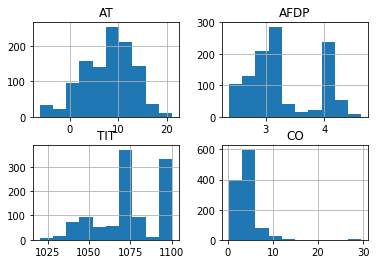

In [50]:
X.hist()

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AFDP'}>],
       [<AxesSubplot:title={'center':'TIT'}>,
        <AxesSubplot:title={'center':'CO'}>]], dtype=object)

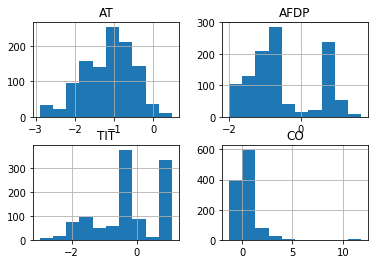

In [51]:
Xs.hist()

In [52]:
X.columns

Index(['AT', 'AFDP', 'TIT', 'CO'], dtype='object')

#### Also the distributions look nearly same before and after standard scaling

In [53]:
X_AT_v=X['AT'].values
print(X_AT_v.shape)

X_AFDP_v= X['AFDP'].values

X_TIT_v=X['TIT'].values

X_CO_v =X['CO'].values



X_AT=X['AT']
print(X_AT.shape)

X_AFDP= X['AFDP']

X_TIT=X['TIT']

X_CO =X['CO']


X_AT_test_v=X_test['AT'].values
print(X_AT_test_v.shape)

X_AFDP_test_v= X_test['AFDP'].values

X_TIT_test_v=X_test['TIT'].values

X_CO_test_v=X_test['CO'].values



X_AT_test=X_test['AT']
print(X_AT_test.shape)

X_AFDP_test= X_test['AFDP']

X_TIT_test=X_test['TIT']

X_CO_test=X_test['CO']


X_AT_train_v=X_train['AT'].values
print(X_AT_train_v.shape)

X_AFDP_train_v= X_train['AFDP'].values

X_TIT_train_v=X_train['TIT'].values

X_CO_train_v=X_train['CO'].values



X_AT_train=X_train['AT']
print(X_AT_train.shape)

X_AFDP_train= X_train['AFDP']

X_TIT_train=X_train['TIT']

X_CO_train=X_train['CO']
### making vars for prior for each feature for df_scaled

Xsv=Xs.values
yv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

yv_train=y_train.values
yv_test=y_test.values

ysv_train=ys_train.values
ysv_test=ys_test.values


print(yv_train.shape,yv_test.shape)

### making vars for prior for each feature for df
Xs.columns
Xs_AT_v=Xs['AT'].values
print(Xs_AT_v.shape)

Xs_AFDP_v= Xs['AFDP'].values

Xs_TIT_v=Xs['TIT'].values

Xs_CO_v =Xs['CO'].values



Xs_AT=Xs['AT']
print(Xs_AT.shape)

Xs_AFDP= Xs['AFDP']

Xs_TIT=Xs['TIT']

Xs_CO =Xs['CO']


Xs_AT_test_v=Xs_test['AT'].values
print(Xs_AT_test_v.shape)

Xs_AFDP_test_v= Xs_test['AFDP'].values

Xs_TIT_test_v=Xs_test['TIT'].values

Xs_CO_test_v=Xs_test['CO'].values



Xs_AT_test=Xs_test['AT']
print(Xs_AT_test.shape)

Xs_AFDP_test= Xs_test['AFDP']

Xs_TIT_test=Xs_test['TIT']

Xs_CO_test=Xs_test['CO']


Xs_AT_train_v=Xs_train['AT'].values
print(Xs_AT_train_v.shape)

Xs_AFDP_train_v= Xs_train['AFDP'].values

Xs_TIT_train_v=Xs_train['TIT'].values

Xs_CO_train_v=Xs_train['CO'].values



Xs_AT_train=Xs_train['AT']
print(Xs_AT_train.shape)

Xs_AFDP_train= Xs_train['AFDP']

Xs_TIT_train=Xs_train['TIT']

Xs_CO_train=Xs_train['CO']

(1107,)
(1107,)
(333,)
(333,)
(774,)
(774,)
(774, 4) (333, 4)
(774,) (333,)
(1107,)
(1107,)
(333,)
(333,)
(774,)
(774,)


### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Multiple Linear Regression using MCMC

### MLR of df_scaled (general and specified priors are same as df_scaled is standard scalar)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, CO, TIT, AFDP, AT, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 28 seconds.
The acceptance probability does not match the target. It is 0.8879738623224043, but should be close to 0.8. Try to increase the number of tuning steps.


4
1107
Root mean square error :  0.49015393429861825
Mean square error :  0.24025087930841416
R2-score :  0.6325352466589932
Adjusted R2-score :  0.6312014363020385


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.33,0.04,-0.41,-0.25,0.00,0.00,25796.00,25782.00,25795.00,25125.00,1.00
AT,-0.55,0.03,-0.60,-0.50,0.00,0.00,28227.00,28186.00,28218.00,25227.00,1.00
AFDP,-0.93,0.05,-1.03,-0.83,0.00,0.00,23514.00,23514.00,23513.00,24649.00,1.00
TIT,0.29,0.06,0.17,0.41,0.00,0.00,22148.00,22148.00,22162.00,22763.00,1.00
CO,0.48,0.03,0.42,0.54,0.00,0.00,26982.00,26982.00,26978.00,26311.00,1.00
ϵ,0.48,0.01,0.46,0.50,0.00,0.00,35340.00,35177.00,35597.00,25312.00,1.00


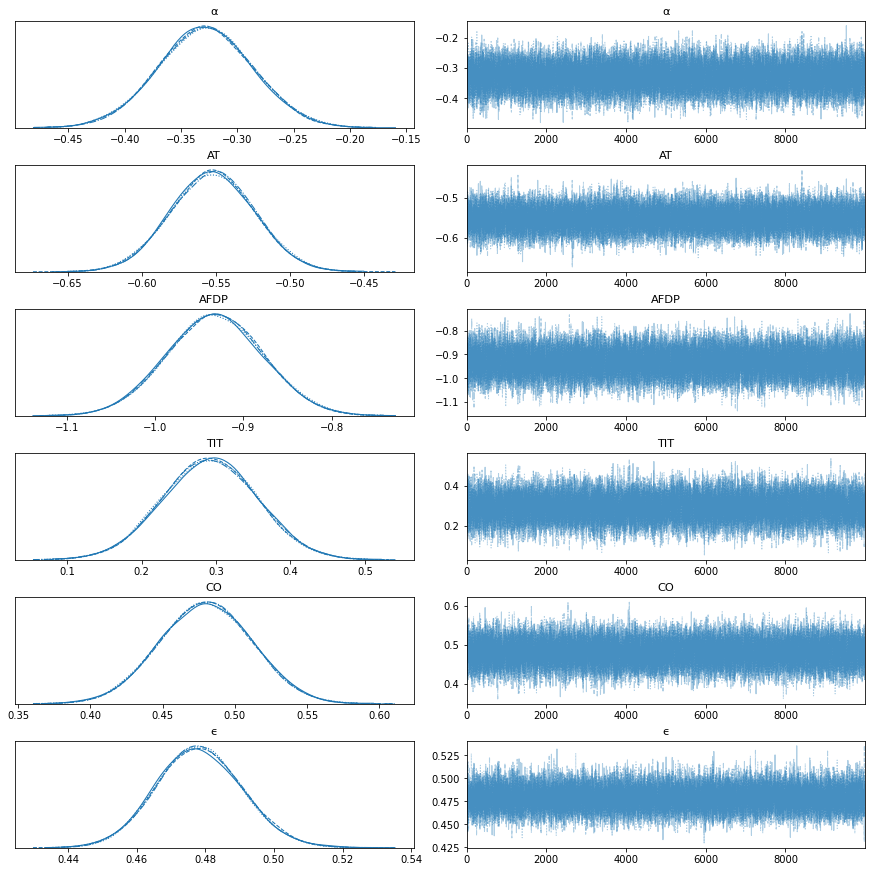

In [54]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_AT = pm.Normal('AT', mu=0, sd=1)
    β_AFDP = pm.Normal('AFDP', mu=0, sd=1)
    β_TIT = pm.Normal('TIT', mu=0, sd=1)
    CO = pm.Normal('CO', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + Xs_AT_train_v*β_AT + Xs_AFDP_train_v*β_AFDP + Xs_TIT_train_v*β_TIT + Xs_CO_train_v*CO
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
    
#     step = pm.Slice()

#     trace = pm.sample(10000,step, tune=1000)


    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_AT=trace['AT'].mean()
beta_AFDP=trace['AFDP'].mean()
beta_TIT=trace['TIT'].mean()
beta_CO=trace['CO'].mean()



# Predicted y oytput
y_p = alpha + beta_AT*Xs_AT_test + beta_AFDP*Xs_AFDP_test+ beta_TIT*Xs_TIT_test+ beta_CO*Xs_CO_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ysv_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(ys_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(ys_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-NUTS-train/test datastet (general priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

## MLR on train-test dataset df

#### 1)	Generic weakly informative prior: normal(0, 1)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [CO]
>Slice: [TIT]
>Slice: [AFDP]
>Slice: [AT]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 32 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
1107
Root mean square error :  0.49018628087464905
Mean square error :  0.2402825899577203
R2-score :  0.6324867450844761
Adjusted R2-score :  0.6311527586782492


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.33,0.04,-0.41,-0.25,0.00,0.00,3149.00,3149.00,3150.00,6854.00,1.00
AT,-0.55,0.03,-0.60,-0.50,0.00,0.00,4553.00,4553.00,4550.00,9204.00,1.00
AFDP,-0.93,0.05,-1.03,-0.83,0.00,0.00,1804.00,1804.00,1804.00,3369.00,1.00
TIT,0.29,0.06,0.18,0.41,0.00,0.00,1734.00,1734.00,1736.00,3006.00,1.00
CO,0.48,0.03,0.42,0.54,0.00,0.00,3863.00,3863.00,3864.00,9864.00,1.00
ϵ,0.48,0.01,0.46,0.50,0.00,0.00,39147.00,39106.00,39156.00,29327.00,1.00


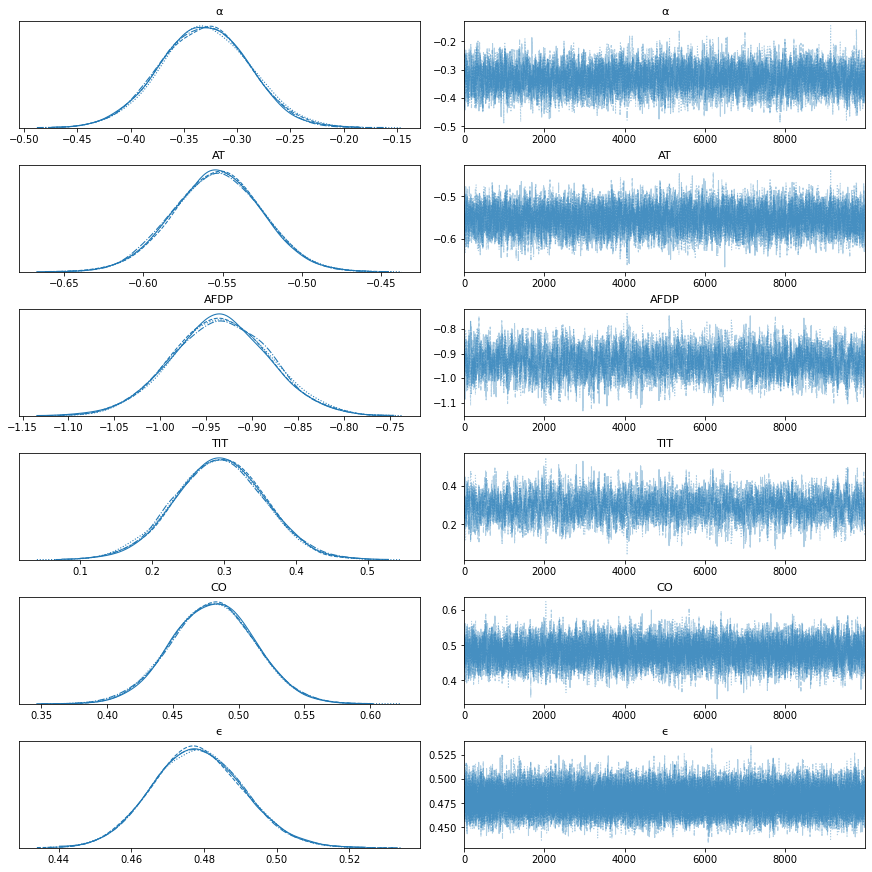

In [55]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_AT = pm.Normal('AT', mu=0, sd=1)
    β_AFDP = pm.Normal('AFDP', mu=0, sd=1)
    β_TIT = pm.Normal('TIT', mu=0, sd=1)
    CO = pm.Normal('CO', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + Xs_AT_train_v*β_AT + Xs_AFDP_train_v*β_AFDP + Xs_TIT_train_v*β_TIT + Xs_CO_train_v*CO
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_AT=trace['AT'].mean()
beta_AFDP=trace['AFDP'].mean()
beta_TIT=trace['TIT'].mean()
beta_CO=trace['CO'].mean()



# Predicted y oytput
y_p = alpha + beta_AT*Xs_AT_test + beta_AFDP*Xs_AFDP_test+ beta_TIT*Xs_TIT_test+ beta_CO*Xs_CO_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(ysv_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(ys_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(ys_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

## MLR on train-test dataset df NO SCALING
#### 1)	Generic weakly informative prior: normal(0, 1)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [CO]
>Slice: [TIT]
>Slice: [AFDP]
>Slice: [AT]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 40 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
1107
Root mean square error :  5.857820273074175
Mean square error :  34.3140583516388
R2-score :  0.5764555078378213
Adjusted R2-score :  0.5749181412601001


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,0.38,0.99,-1.43,2.29,0.04,0.03,683.00,683.00,682.00,1797.00,1.01
AT,-0.70,0.04,-0.77,-0.63,0.00,0.00,1884.00,1884.00,1884.00,7360.00,1.00
AFDP,-12.89,0.44,-13.75,-12.09,0.03,0.02,270.00,270.00,270.00,623.00,1.02
TIT,0.10,0.00,0.10,0.10,0.00,0.00,227.00,227.00,227.00,486.00,1.02
CO,2.60,0.11,2.40,2.82,0.01,0.00,616.00,616.00,617.00,2041.00,1.01
ϵ,5.46,0.14,5.19,5.73,0.00,0.00,3758.00,3756.00,3770.00,17703.00,1.00


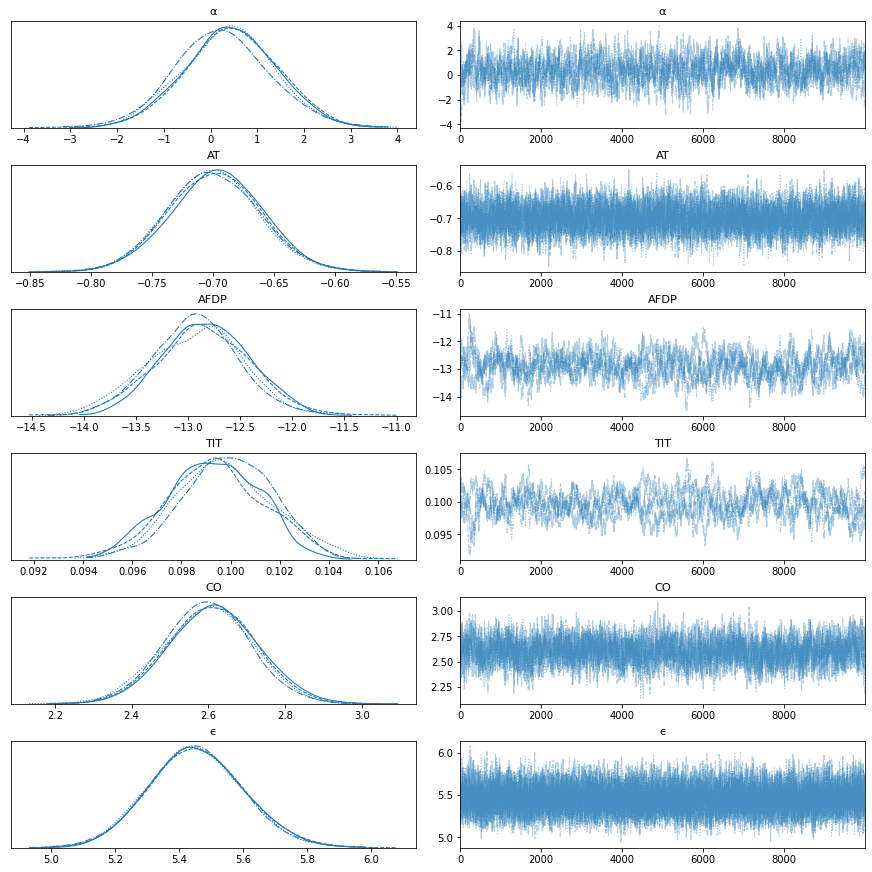

In [56]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_AT = pm.Normal('AT', mu=0, sd=1)
    β_AFDP = pm.Normal('AFDP', mu=0, sd=1)
    β_TIT = pm.Normal('TIT', mu=0, sd=1)
    CO = pm.Normal('CO', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_AT_train_v*β_AT + X_AFDP_train_v*β_AFDP + X_TIT_train_v*β_TIT + X_CO_train_v*CO
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
    
    step = pm.Slice()

    trace = pm.sample(10000,step, tune=1000)


#     trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_AT=trace['AT'].mean()
beta_AFDP=trace['AFDP'].mean()
beta_TIT=trace['TIT'].mean()
beta_CO=trace['CO'].mean()



# Predicted y oytput
y_p = alpha + beta_AT*X_AT_test + beta_AFDP*X_AFDP_test+ beta_TIT*X_TIT_test+ beta_CO*X_CO_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Slice-train/test datastet (general priors','sampling/VI_method':'Slice','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

### Results show scaled dataset df is better and will be used further
#### As we have chosen to continue with scaled datastet so general and specific priors are same for scaled dataset

In [57]:
model_mlr

In [58]:
Xs.describe()

,AT,AFDP,TIT,CO
count,1107.00,1107.00,1107.00,1107.00
mean,-1.16,-0.52,-0.19,0.36
std,0.64,0.95,1.02,0.95
min,-2.90,-2.02,-2.97,-1.30
25%,-1.64,-1.17,-0.74,-0.12
50%,-1.09,-0.83,-0.23,0.15
75%,-0.69,0.66,1.06,0.52
max,0.47,1.69,1.07,11.84


### Chosing the best model hence from above results. The best results are given by  MLR on train/test  scaled datset we will use for our further analysis


In [60]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>


## Making a MCMC function for our best models

In [67]:
def model_mcmc(sampling):

    with pm.Model() as model_mlr:
        
    
           # Priors
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution

        β_AT = pm.Normal('AT', mu=0, sd=1)
        β_AFDP = pm.Normal('AFDP', mu=0, sd=1)
        β_TIT = pm.Normal('TIT', mu=0, sd=1)
        CO = pm.Normal('CO', mu=0., sd=1)

        ϵ = pm.HalfCauchy('ϵ', 5)

        μ = α + Xs_AT_train_v*β_AT + Xs_AFDP_train_v*β_AFDP + Xs_TIT_train_v*β_TIT + Xs_CO_train_v*CO

        # likelihood

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)

#         step = pm.Slice()
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace = pm.sample(10000,step, tune=1000)


    #     trace = pm.sample(10000, tune=1000)


    ## Finding the paramters from the  drawn samples

    alpha=trace['α'].mean()
    beta_AT=trace['AT'].mean()
    beta_AFDP=trace['AFDP'].mean()
    beta_TIT=trace['TIT'].mean()
    beta_CO=trace['CO'].mean()



    # Predicted y oytput
    y_p = alpha + beta_AT*Xs_AT_test + beta_AFDP*Xs_AFDP_test+ beta_TIT*Xs_TIT_test+ beta_CO*Xs_CO_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(ysv_test, y_p, squared=False)
    print('Root mean square error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
    print('Mean square error : ',mse)
    r2= r2_score(ys_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    
    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-train/test datastet',
                                        'sampling/VI_method':sampling,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    print(pm.summary(trace))
    return(model_mlr)

## Making a function for Variational Inference

In [68]:
def model_vi(vi_method):
    vi=vi_method

    with pm.Model() as model_mlr:

            # Priors
        α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution

        β_AT = pm.Normal('AT', mu=0, sd=1)
        β_AFDP = pm.Normal('AFDP', mu=0, sd=1)
        β_TIT = pm.Normal('TIT', mu=0, sd=1)
        CO = pm.Normal('CO', mu=0., sd=1)

        ϵ = pm.HalfCauchy('ϵ', 5)

        μ = α + Xs_AT_train_v*β_AT + Xs_AFDP_train_v*β_AFDP + Xs_TIT_train_v*β_TIT + Xs_CO_train_v*CO

        # likelihood

#         y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)
        
        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=ysv_train)
        


    ## Finding the paramters from the  drawn samples
       
    print('for VI')
    with model_mlr:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace=mean_field.sample(10000)    



    alpha=trace['α'].mean()
    beta_AT=trace['AT'].mean()
    beta_AFDP=trace['AFDP'].mean()
    beta_TIT=trace['TIT'].mean()
    beta_CO=trace['CO'].mean()


    # Predicted y oytput
    y_p = alpha + beta_AT*Xs_AT_test + beta_AFDP*Xs_AFDP_test+ beta_TIT*Xs_TIT_test+ beta_CO*Xs_CO_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

#     rmse = mean_squared_error(y_test, y_p, squared=False)
    rmse = mean_squared_error(ys_test, y_p, squared=False)
    print('Root mean seure error : ',rmse)
    mse = mean_squared_error(ys_test, y_p)
#     mse = mean_squared_error(y_test, y_p)
    print('Mean seure error : ',mse)
    r2= r2_score(ys_test, y_p)
#     r2= r2_score(y_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' -train/test datastet (G)',
                                        'sampling/VI_method':vi_method,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    pm.summary(trace)
    return(model_mlr)

In [69]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>


# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, CO, TIT, AFDP, AT, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 28 seconds.


4
1107
Root mean square error :  0.49032576366062364
Mean square error :  0.24041935450937374
R2-score :  0.6322775631144297
Adjusted R2-score :  0.6309428174270049
      mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α    -0.33 0.04   -0.41    -0.25       0.00     0.00  23099.00 23087.00   
AT   -0.55 0.03   -0.60    -0.50       0.00     0.00  26820.00 26820.00   
AFDP -0.93 0.05   -1.03    -0.83       0.00     0.00  19809.00 19796.00   
TIT   0.29 0.06    0.17     0.41       0.00     0.00  19093.00 18948.00   
CO    0.48 0.03    0.42     0.54       0.00     0.00  25302.00 25208.00   
ϵ     0.48 0.01    0.46     0.50       0.00     0.00  34481.00 34418.00   

      ess_bulk  ess_tail  r_hat  
α     23101.00  23221.00   1.00  
AT    26841.00  23104.00   1.00  
AFDP  19808.00  23214.00   1.00  
TIT   19099.00  21637.00   1.00  
CO    25321.00  27195.00   1.00  
ϵ     34523.00  24609.00   1.00  


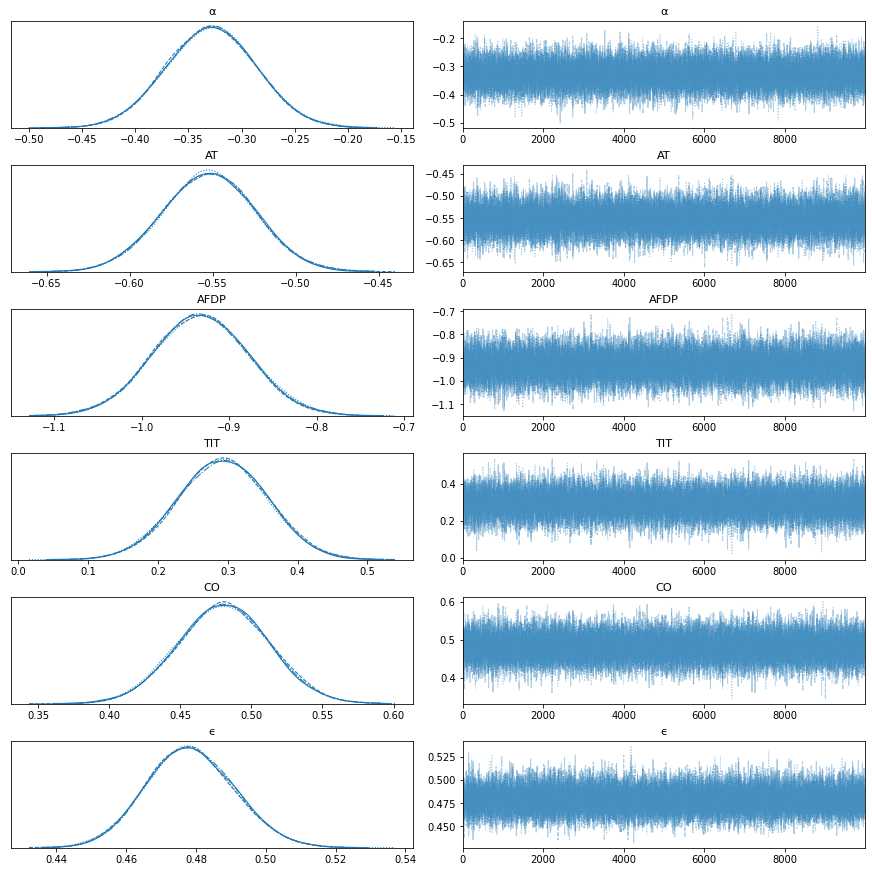

In [70]:
nuts=model_mcmc('NUTS')

In [71]:
model_mlr

In [72]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>
5,NUTS MLR-train/test datastet,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc0ae97d0>


## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [ϵ, CO, TIT, AFDP, AT, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15 seconds.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7524892849725413, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7764119844523926, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8479150600208388, but should be close to 0.65. Try to increase the number of tuning steps.


4
1107
Root mean square error :  0.49032314305212554
Mean square error :  0.24041678461251514
R2-score :  0.6322814937827292
Adjusted R2-score :  0.6309467623627029
      mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α    -0.33 0.04   -0.41    -0.25       0.00     0.00  11542.00 11542.00   
AT   -0.55 0.03   -0.60    -0.50       0.00     0.00  14496.00 14496.00   
AFDP -0.93 0.05   -1.03    -0.83       0.00     0.00  13890.00 13866.00   
TIT   0.29 0.06    0.17     0.41       0.00     0.00  12254.00 12254.00   
CO    0.48 0.03    0.42     0.54       0.00     0.00  19123.00 19114.00   
ϵ     0.48 0.01    0.46     0.50       0.00     0.00  28990.00 28990.00   

      ess_bulk  ess_tail  r_hat  
α     11540.00  18748.00   1.00  
AT    14496.00  19210.00   1.00  
AFDP  13895.00  17835.00   1.00  
TIT   12255.00  16972.00   1.00  
CO    19126.00  20078.00   1.00  
ϵ     28824.00  20715.00   1.00  


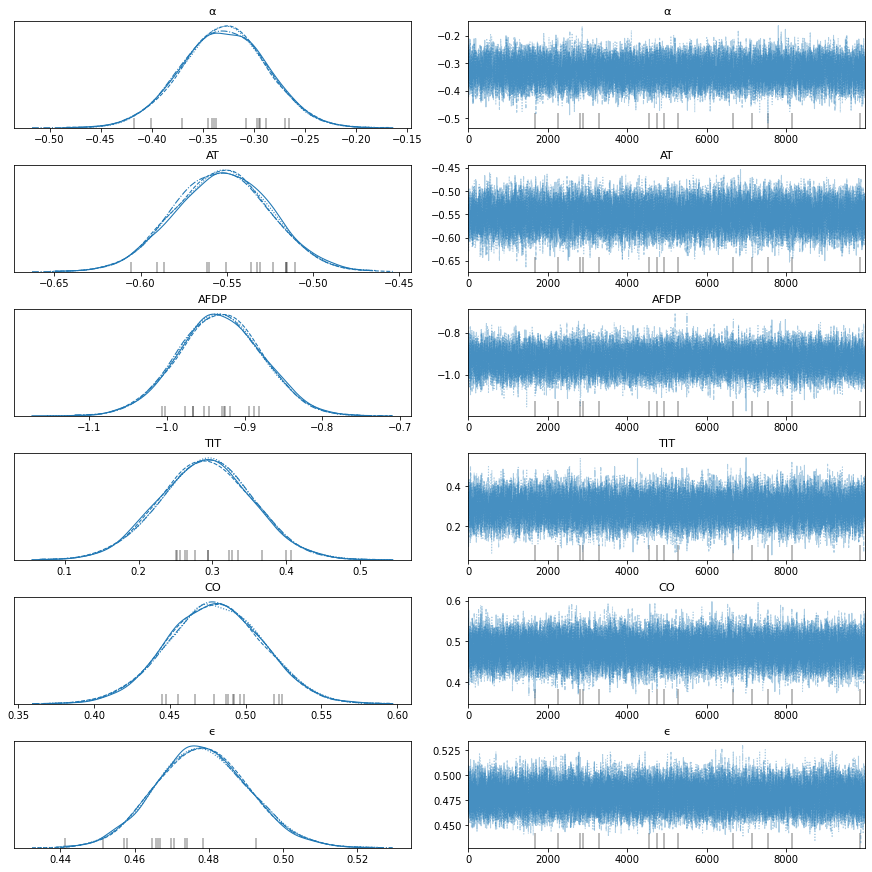

In [73]:
hmc=model_mcmc('HMC')

In [74]:
model_mlr

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [CO]
>Metropolis: [TIT]
>Metropolis: [AFDP]
>Metropolis: [AT]
>Metropolis: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 12 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1107
Root mean square error :  0.49046688986231907
Mean square error :  0.24055777005121623
R2-score :  0.6320658559477874
Adjusted R2-score :  0.6307303418132966
      mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α    -0.33 0.04   -0.41    -0.26       0.00     0.00    372.00  372.00   
AT   -0.55 0.03   -0.60    -0.50       0.00     0.00    458.00  458.00   
AFDP -0.94 0.05   -1.03    -0.85       0.00     0.00    189.00  189.00   
TIT   0.30 0.06    0.19     0.41       0.01     0.00    166.00  166.00   
CO    0.48 0.03    0.43     0.54       0.00     0.00    358.00  355.00   
ϵ     0.48 0.01    0.46     0.50       0.00     0.00   3353.00 3347.00   

      ess_bulk  ess_tail  r_hat  
α       371.00    949.00   1.02  
AT      458.00    993.00   1.02  
AFDP    190.00    403.00   1.01  
TIT     166.00    292.00   1.01  
CO      359.00    718.00   1.01  
ϵ      3412.00   3790.00   1.00  


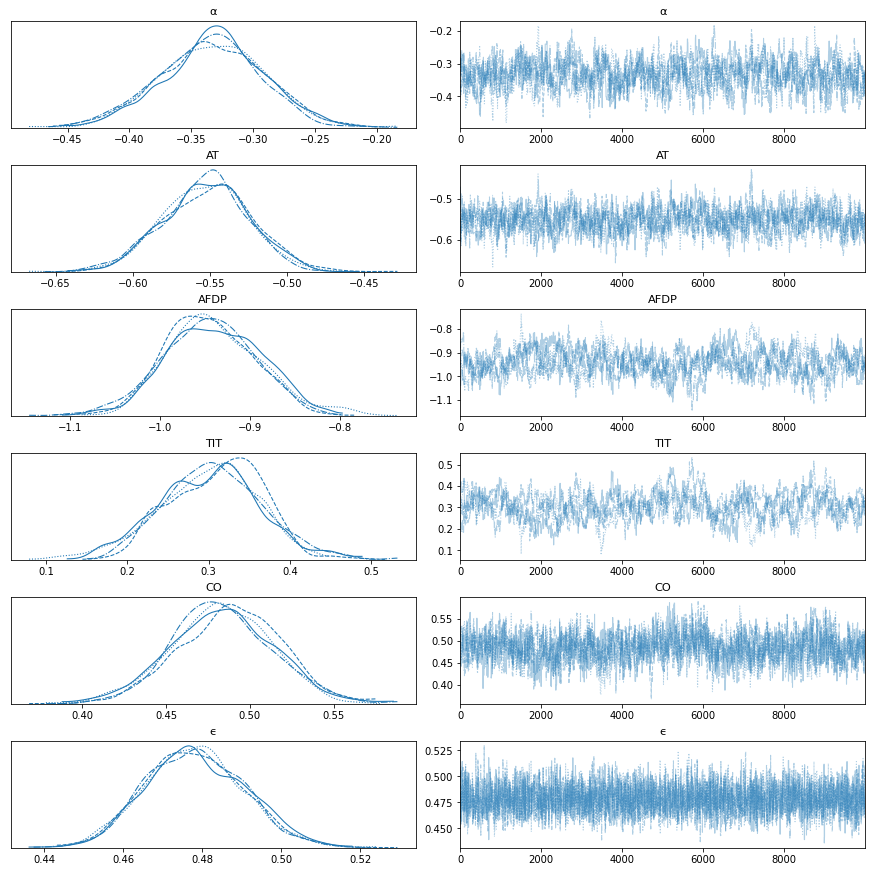

In [75]:
metrolpis=model_mcmc('metropolis')

In [76]:
model_mlr

In [77]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>
5,NUTS MLR-train/test datastet,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc0ae97d0>
6,HMC MLR-train/test datastet,HMC,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc4aac410>
7,metropolis MLR-train/test datastet,metropolis,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1b785d0>


## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ϵ]
>Slice: [CO]
>Slice: [TIT]
>Slice: [AFDP]
>Slice: [AT]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 38 seconds.
The number of effective samples is smaller than 10% for some parameters.


4
1107
Root mean square error :  0.49020264389681467
Mean square error :  0.24029863208342728
R2-score :  0.6324622085842021
Adjusted R2-score :  0.6311281331162681
      mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α    -0.33 0.04   -0.41    -0.26       0.00     0.00   3377.00  3364.00   
AT   -0.55 0.03   -0.60    -0.50       0.00     0.00   4336.00  4325.00   
AFDP -0.93 0.05   -1.03    -0.84       0.00     0.00   1584.00  1584.00   
TIT   0.29 0.06    0.18     0.41       0.00     0.00   1480.00  1480.00   
CO    0.48 0.03    0.42     0.54       0.00     0.00   3539.00  3539.00   
ϵ     0.48 0.01    0.46     0.50       0.00     0.00  38143.00 38040.00   

      ess_bulk  ess_tail  r_hat  
α      3381.00   7066.00   1.00  
AT     4339.00   7771.00   1.00  
AFDP   1587.00   3159.00   1.00  
TIT    1483.00   2831.00   1.00  
CO     3541.00   8206.00   1.00  
ϵ     38262.00  29276.00   1.00  


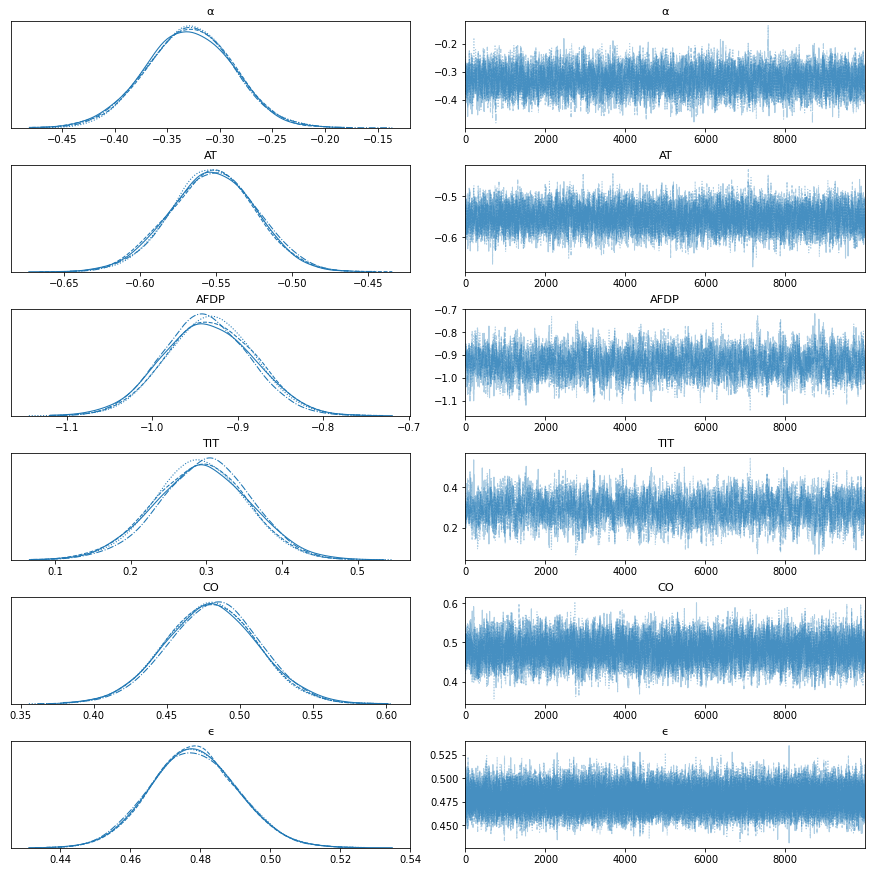

In [78]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 932.95


4
1107
Root mean seure error :  0.523072840010926
Mean seure error :  0.2736051959570958
R2-score :  0.5815196758712928
Adjusted R2-score :  0.5800006910287203


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

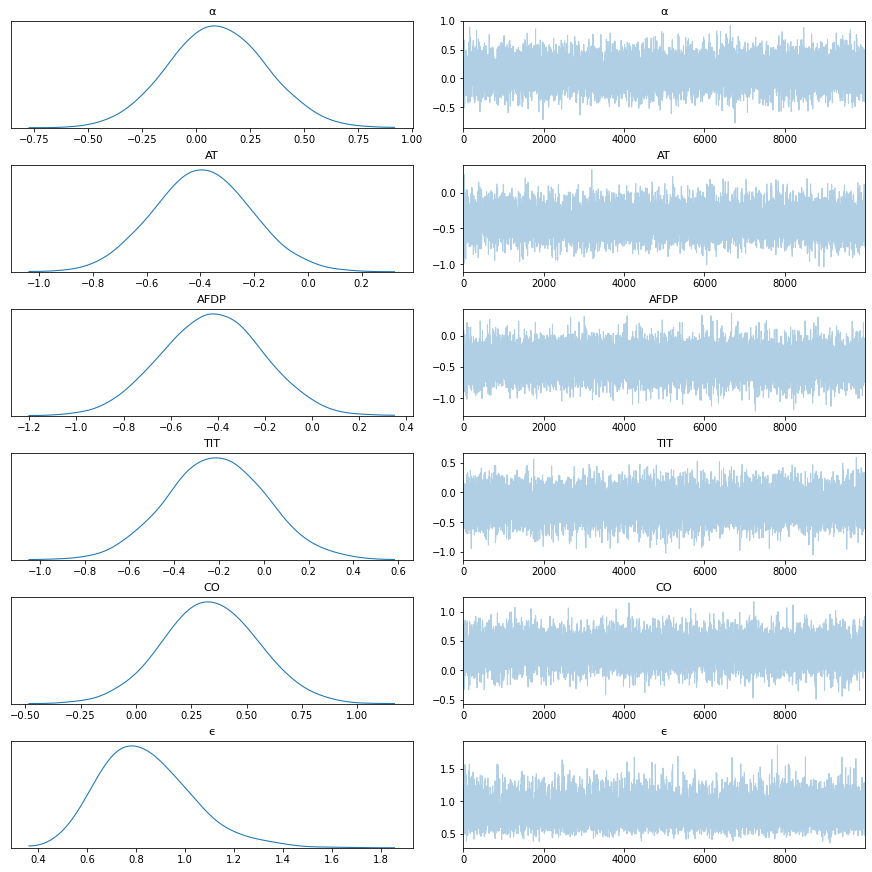

In [79]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 560.42


4
1107
Root mean seure error :  0.49142449979726777
Mean seure error :  0.24149803900099484
R2-score :  0.6306277105445355
Adjusted R2-score :  0.6292869762815392


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

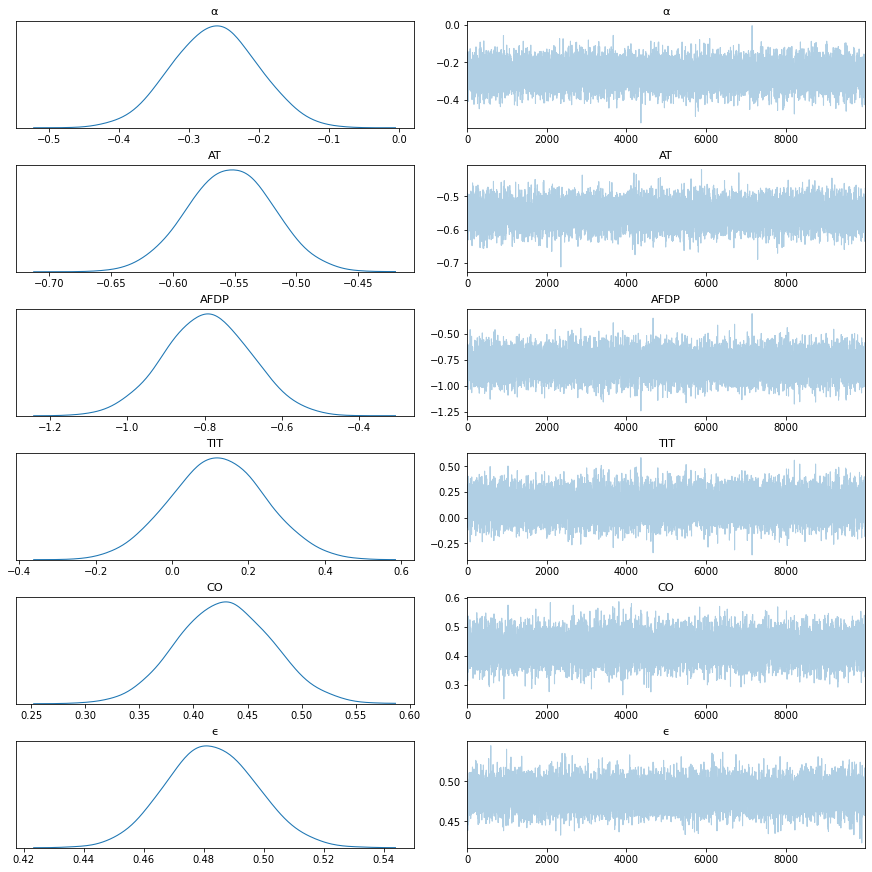

In [80]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


4
1107
Root mean seure error :  0.48987320155231256
Mean seure error :  0.23997575359911266
R2-score :  0.6329560526148226
Adjusted R2-score :  0.6316237696842049


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

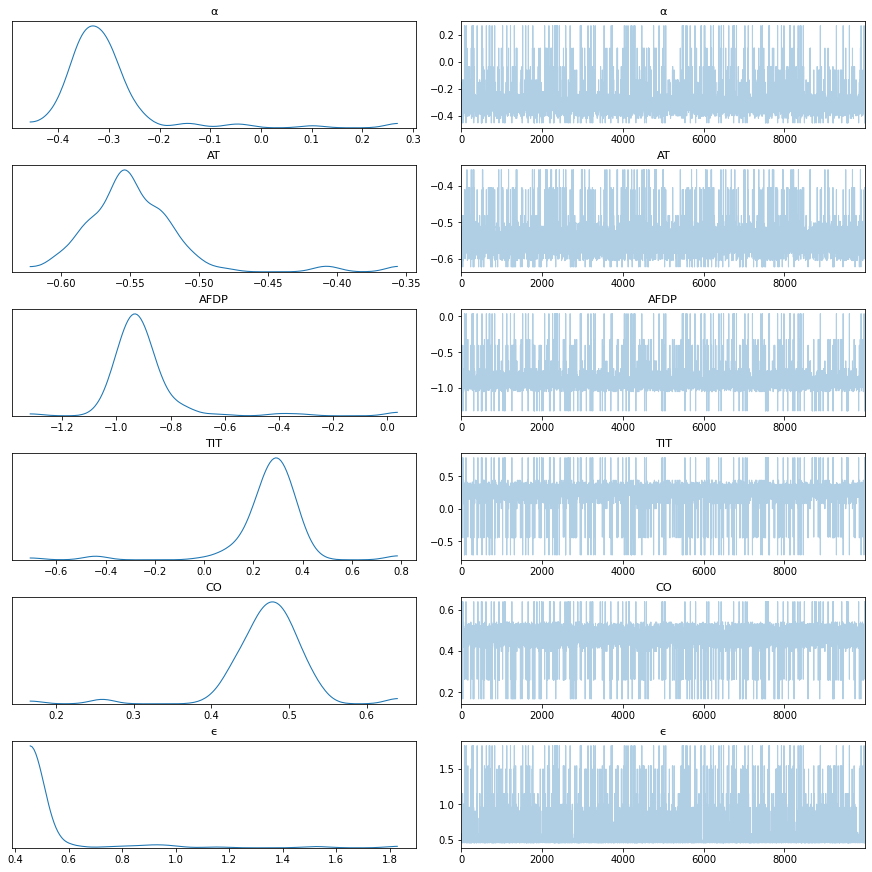

In [81]:
svgd= model_vi('svgd')

In [82]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [83]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>
5,NUTS MLR-train/test datastet,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc0ae97d0>
6,HMC MLR-train/test datastet,HMC,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc4aac410>
7,metropolis MLR-train/test datastet,metropolis,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1b785d0>
8,slice MLR-train/test datastet,slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc6d51790>
9,advi -train/test datastet (G),advi,0.52,0.27,0.58,0.58,<pymc3.model.Model object at 0x7f3bc2fe9d10>


In [84]:
df_results_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
4,MLR-Slice-train/test datastet (general priors,Slice,5.86,34.31,0.58,0.57,<pymc3.model.Model object at 0x7f3bc3b8f210>
5,NUTS MLR-train/test datastet,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc0ae97d0>
6,HMC MLR-train/test datastet,HMC,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc4aac410>
7,metropolis MLR-train/test datastet,metropolis,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1b785d0>
8,slice MLR-train/test datastet,slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc6d51790>
9,advi -train/test datastet (G),advi,0.52,0.27,0.58,0.58,<pymc3.model.Model object at 0x7f3bc2fe9d10>


In [85]:
df_reults_r1=df_results_r1.sort_values('Adj_R2',ascending=False)

df_reults_r1

,model_name,sampling/VI_method,RMSE,MSE,R2,Adj_R2,model_details
11,svgd -train/test datastet (G),svgd,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c03e12790>
2,MLR-NUTS-train/test datastet (general priors,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3c003e9490>
3,MLR-Slice-train/test datastet (general priors,Slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1f95a50>
8,slice MLR-train/test datastet,slice,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc6d51790>
0,Linear Regression-tain/test dataste,NA,5.46,29.78,0.63,0.63,LinearRegression()
1,Linear Regression-tain/test dataste,NA,0.49,0.24,0.63,0.63,LinearRegression()
6,HMC MLR-train/test datastet,HMC,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc4aac410>
5,NUTS MLR-train/test datastet,NUTS,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc0ae97d0>
7,metropolis MLR-train/test datastet,metropolis,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc1b785d0>
10,fullrank_advi -train/test datastet (G),fullrank_advi,0.49,0.24,0.63,0.63,<pymc3.model.Model object at 0x7f3bc077fa10>


In [86]:
# save the final data
df_results_r1.to_csv('df_results_r5.csv',index=False)

## Conclusion

#### We can see that MCMC models have performed better than VI models
#### Also we see the performance of MCMC is at par and a bit better than normal Linear Regression
#### NUTS Sampling method and SVGD gave best results
#### Best results obtained on scaled dataset